## Import Library

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import RANSACRegressor, LinearRegression, Ridge, Lasso
from statsmodels.api import OLS, add_constant
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

## Import Dataset

In [220]:
path = 'C:/Users/julia/Desktop/Yanjun/Python/Data/final_data.csv6'
car = pd.read_csv(path)
car

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
0,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.412947
1,-0.844782,0.074449,-1.690772,-0.546059,0.519071,0.537874,1.086670,-1.188177,-0.689072,0.413187
2,-0.190566,0.604046,-0.708596,-0.691627,-2.404880,-1.859172,1.086670,-1.188177,-0.689072,0.413187
3,0.136542,-0.431076,0.173698,-0.109354,-0.517266,0.537874,1.086670,0.841625,-0.689072,0.412989
4,0.230001,0.218885,0.107110,-1.273900,-0.517266,-1.859172,1.086670,-1.188177,-0.689072,0.413249
...,...,...,...,...,...,...,...,...,...,...
200,1.398245,0.339248,1.721873,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413210
201,1.351515,0.339248,1.721873,-0.837195,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.413341
202,1.398245,1.109571,1.721873,-1.128332,0.926204,-1.859172,1.086670,-1.188177,-0.689072,0.413460
203,1.398245,0.435538,1.721873,-0.546059,-1.183483,-1.859172,-0.920243,-1.188177,-0.689072,0.413502


## Split X and y

In [221]:
cond = car.columns == 'price'
features = car.columns[~cond]
X = car[features]
y = car['price']

## Split train and test

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## RANSAC

In [223]:
# X = add_constant(X)

In [224]:
# result = OLS(y,X).fit()
# result.summary()

## Ridge (L2)

In [225]:
# fit the model
ridge = Ridge(alpha = 1)
ridge.fit(X = X_train, y = y_train)
cofficient = ridge.coef_
features = ridge.feature_names_in_
cofficient

array([ 1.75979477e-04,  9.28218193e-05, -6.60887747e-06, -1.65770210e-04,
        4.06601467e-05, -6.80797513e-05,  2.79683383e-05, -7.74160580e-05,
       -1.41238154e-04])

In [226]:
intercept = ridge.intercept_
intercept

0.41264797455822727

In [227]:
ridge.score(X = X_train, y = y_train)

0.8504820864921605

In [228]:
# print the regression equation 
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00018 )
 + enginesize * (0.00009 )
 + wheelbase * (-0.00001 )
 + highwaympg * (-0.00017 )
 + boreratio * (0.00004 )
 + cylindernumber_four * (-0.00007 )
 + fuelsystem_mpfi * (0.00003 )
 + drivewheel_fwd * (-0.00008 )
 + fuelsystem_2bbl * (-0.00014 )
 + 0.41265


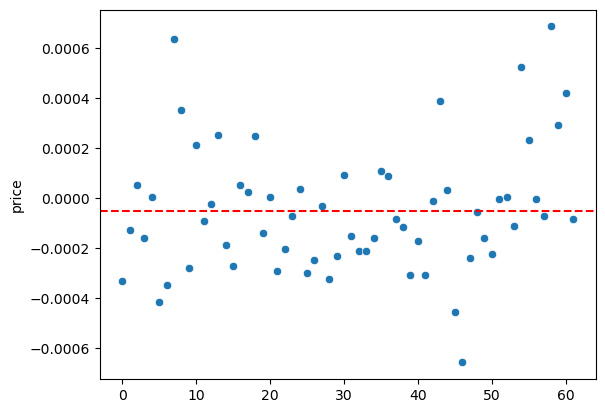

In [229]:
# check the predict
y_predict = ridge.predict(X = X_test)

# check the error 
error_ridge = y_test -  y_predict

# plot the error vs data
sns.scatterplot(x = range(len(X_test)), y = error_ridge, )
plt.axhline(y = error_ridge.mean(), linestyle = '--', color = 'red')
plt.show()
 

In [230]:
# check the r_2 
r2 = r2_score(y_test, y_predict)
r2

0.8487167747734452

## LASSO(L1)

In [231]:
lasso = Lasso(alpha = 0.0003 )
lasso.fit(X = X_train, y = y_train)

Lasso(alpha=0.0003)

In [232]:
cofficient = lasso.coef_
features = lasso.feature_names_in_
cofficient

array([ 1.28582761e-04,  1.80629622e-05,  0.00000000e+00, -1.30788063e-04,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.44219394e-05])

In [233]:
intercept = lasso.intercept_

In [234]:
equation_list = [features[i] + ' * (' + '{:0.5f}'.format(cofficient[i]) + ' )' + '\n' for i in range(len(cofficient))]
equation =  ' + '.join(equation_list)
equation = equation +' + ' + '{:.5f}'.format(intercept)
print(equation)

carwidth * (0.00013 )
 + enginesize * (0.00002 )
 + wheelbase * (0.00000 )
 + highwaympg * (-0.00013 )
 + boreratio * (0.00000 )
 + cylindernumber_four * (-0.00000 )
 + fuelsystem_mpfi * (0.00000 )
 + drivewheel_fwd * (-0.00000 )
 + fuelsystem_2bbl * (-0.00001 )
 + 0.41265


In [235]:
lasso.score(X = X_train, y = y_train)

0.5397000062629143

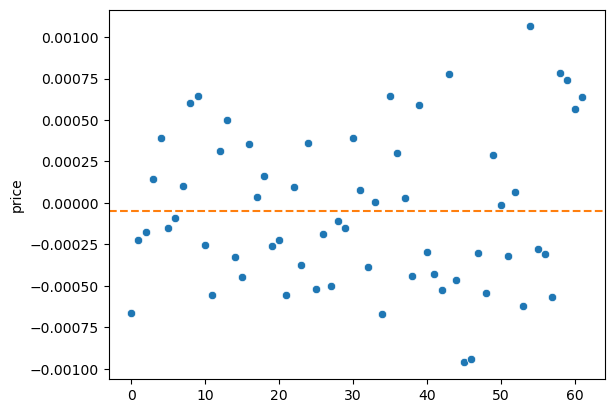

0.5178111249183087

In [236]:
# prdict the result 
y_predict = lasso.predict(X = X_test)

# calculate teh error 
lasso_error = y_test - y_predict

# plot of error vs data
sns.scatterplot(x = range(len(X_test)), y = lasso_error)
plt.axhline(y = lasso_error.mean(), linestyle = '--', color = 'C1' )
plt.show()
r2 = r2_score(y_test, y_predict)
r2

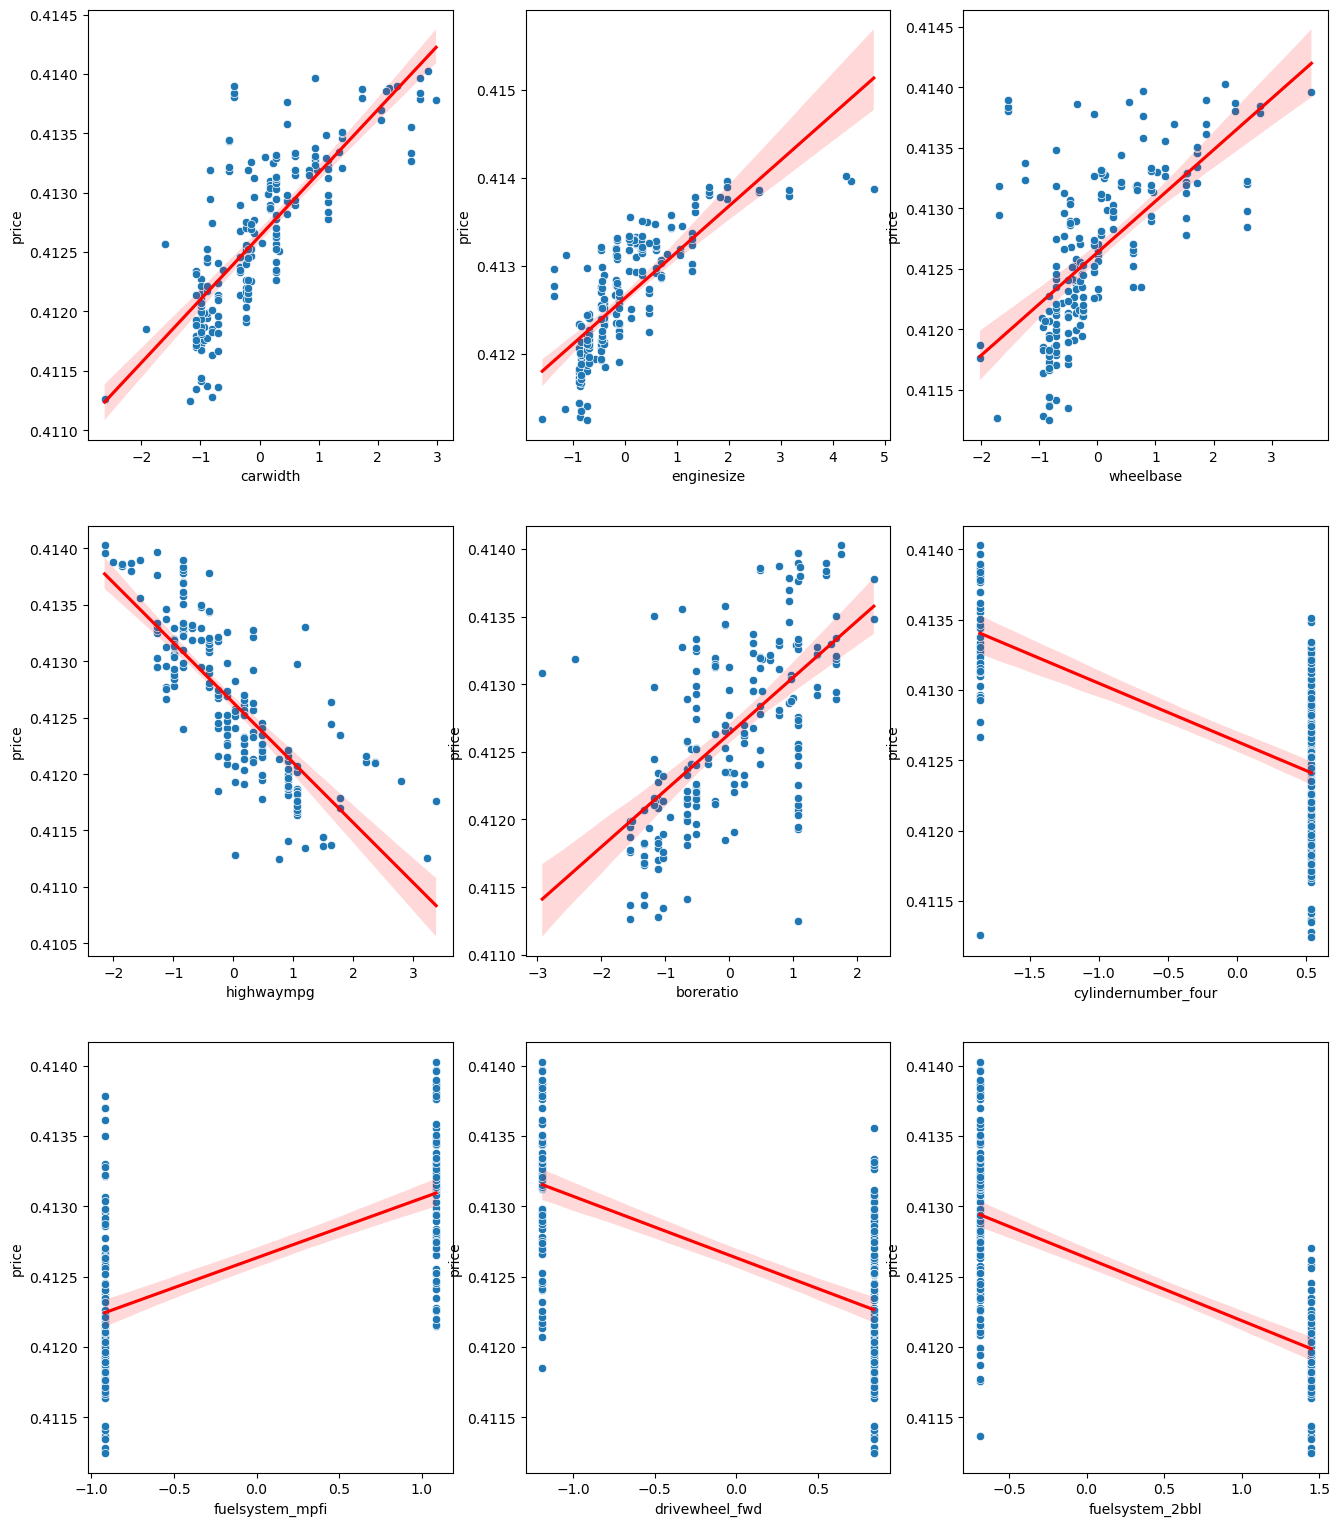

In [237]:
# show the lasso regression plot
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (16,19))
axes = np.ravel(axes)
for j,i in enumerate(car.columns[0:-1]):
  sns.scatterplot(data = car, x = i, y = 'price' ,ax = axes[j] )
  sns.regplot(data = car, x= i, y = 'price', marker = '',color = 'red', ax = axes[j])
plt.show()

## Polynomial regression

In [238]:
# first transform X to square and then use liner regression

poly = PolynomialFeatures(2)    ## transfrom all X to square or the product of two features

X_train_2degree = poly.fit_transform(X= X_train)

lr = LinearRegression()
# fit the model
lr.fit(X = X_train_2degree, y = y_train)

LinearRegression()

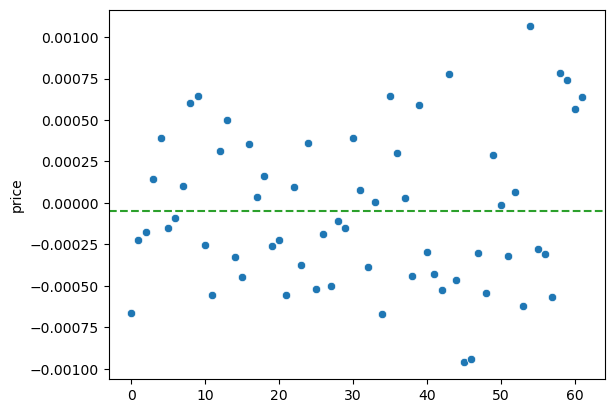

In [239]:
# prdict the result
X_test_2degree = poly.transform(X = X_test)
y_prdict = lr.predict(X = X_test_2degree)

polynomial_error = y_test - y_predict

# plot the error 
sns.scatterplot(x = range(len(X_test)), y = polynomial_error)
plt.axhline(y = polynomial_error.mean(),linestyle = '--', color = 'C2')
plt.show()

In [240]:
X_test_2degree = X_test_2degree.round(5)
X_test_2degree

array([[ 1.     , -0.2373 , -0.11813, ...,  0.70833,  1.22139,  2.10606],
       [ 1.     , -0.2373 , -0.407  , ...,  0.70833, -0.57994,  0.47482],
       [ 1.     , -0.19057, -0.71995, ...,  0.70833, -0.57994,  0.47482],
       ...,
       [ 1.     ,  0.46365,  0.89292, ...,  1.41176,  0.81874,  0.47482],
       [ 1.     , -0.51767, -0.45515, ...,  1.41176,  0.81874,  0.47482],
       [ 1.     ,  2.14592,  2.578  , ...,  1.41176,  0.81874,  0.47482]])

In [241]:
X_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl
85,-0.237296,-0.118132,-0.408949,0.181783,0.074927,0.537874,-0.920243,0.841625,1.451227
88,-0.237296,-0.407003,-0.408949,-0.109354,-0.591290,0.537874,-0.920243,0.841625,-0.689072
184,-0.190566,-0.719947,-0.242478,2.219739,-1.183483,0.537874,-0.920243,0.841625,-0.689072
195,0.603839,0.339248,0.922815,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072
4,0.230001,0.218885,0.107110,-1.273900,-0.517266,-1.859172,1.086670,-1.188177,-0.689072
...,...,...,...,...,...,...,...,...,...
78,-0.704593,-0.840310,-0.841772,1.055193,-1.331531,0.537874,-0.920243,0.841625,1.451227
66,0.089812,0.170739,1.022697,1.200761,0.371023,0.537874,-0.920243,-1.188177,-0.689072
14,0.463650,0.892917,0.789639,-0.837195,-0.073121,-1.859172,1.086670,-1.188177,-0.689072
10,-0.517674,-0.455148,0.406756,-0.254922,0.630108,0.537874,1.086670,-1.188177,-0.689072


## Plot the polynomial plots

In [242]:
# all test data 
car_test = pd.concat((X_test, y_test), axis = 1)

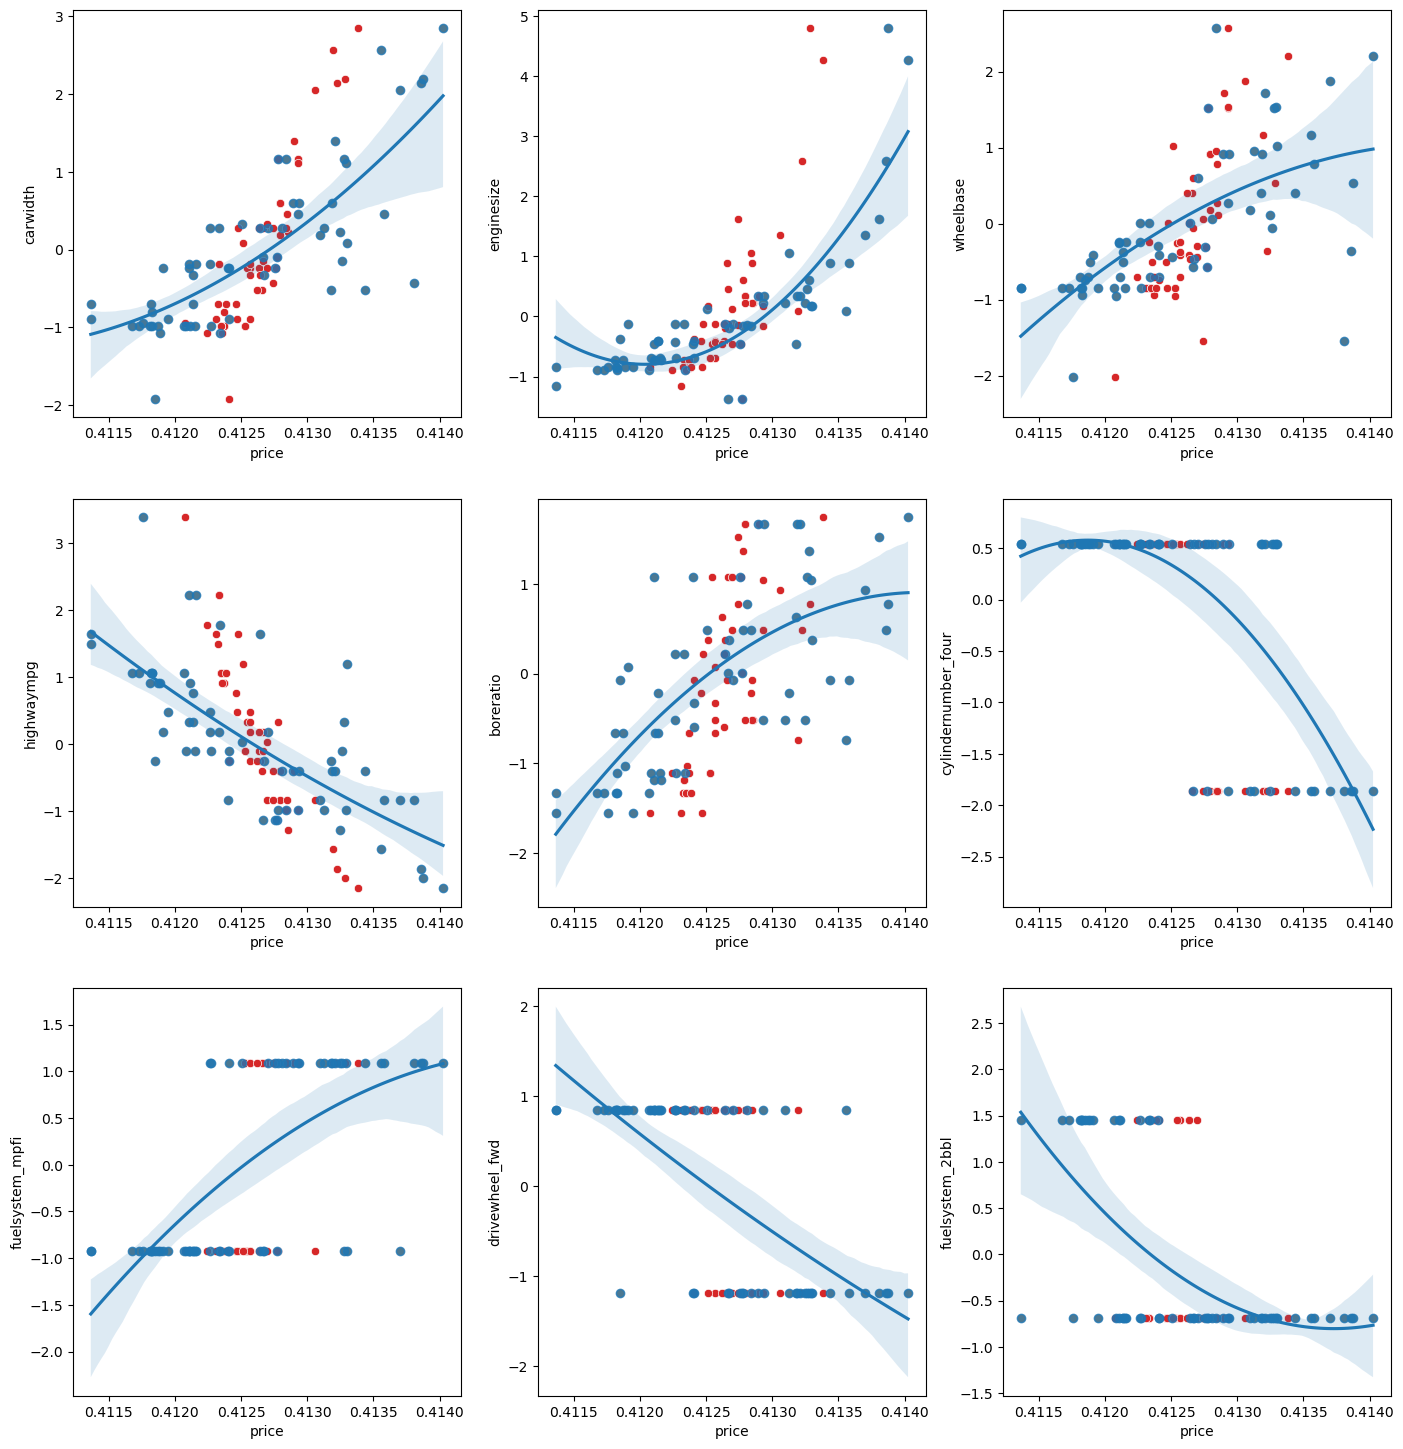

In [243]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,18))
axes = np.ravel(axes)

# test data for price vs all features
for i, j in enumerate(car_test.columns[0:-1]):
  sns.scatterplot(data = car_test, x = 'price', y = j, ax= axes[i], color = 'C1' )
  # predict results vs all features
  sns.scatterplot(x = y_predict, y = car_test.iloc[:,i], ax= axes[i], color = 'C3')
  # polynomial regression with degree = 2
  sns.regplot(data = car_test, x = 'price', y = j, order = 2, ax= axes[i])
plt.show()

In [244]:
lr.score(X_test_2degree, y_test)

-8248872100708.438

In [245]:
r2_score(y_test, y_predict)

0.5178111249183087

In [246]:
X1_test = X_test.copy()
X1_test['price'] = y_predict
X1_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
85,-0.237296,-0.118132,-0.408949,0.181783,0.074927,0.537874,-0.920243,0.841625,1.451227,0.412571
88,-0.237296,-0.407003,-0.408949,-0.109354,-0.591290,0.537874,-0.920243,0.841625,-0.689072,0.412635
184,-0.190566,-0.719947,-0.242478,2.219739,-1.183483,0.537874,-0.920243,0.841625,-0.689072,0.412330
195,0.603839,0.339248,0.922815,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.412794
4,0.230001,0.218885,0.107110,-1.273900,-0.517266,-1.859172,1.086670,-1.188177,-0.689072,0.412858
...,...,...,...,...,...,...,...,...,...,...
78,-0.704593,-0.840310,-0.841772,1.055193,-1.331531,0.537874,-0.920243,0.841625,1.451227,0.412383
66,0.089812,0.170739,1.022697,1.200761,0.371023,0.537874,-0.920243,-1.188177,-0.689072,0.412516
14,0.463650,0.892917,0.789639,-0.837195,-0.073121,-1.859172,1.086670,-1.188177,-0.689072,0.412843
10,-0.517674,-0.455148,0.406756,-0.254922,0.630108,0.537874,1.086670,-1.188177,-0.689072,0.412617


In [247]:
X1_test

,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
85,-0.237296,-0.118132,-0.408949,0.181783,0.074927,0.537874,-0.920243,0.841625,1.451227,0.412571
88,-0.237296,-0.407003,-0.408949,-0.109354,-0.591290,0.537874,-0.920243,0.841625,-0.689072,0.412635
184,-0.190566,-0.719947,-0.242478,2.219739,-1.183483,0.537874,-0.920243,0.841625,-0.689072,0.412330
195,0.603839,0.339248,0.922815,-0.400490,1.666445,0.537874,1.086670,-1.188177,-0.689072,0.412794
4,0.230001,0.218885,0.107110,-1.273900,-0.517266,-1.859172,1.086670,-1.188177,-0.689072,0.412858
...,...,...,...,...,...,...,...,...,...,...
78,-0.704593,-0.840310,-0.841772,1.055193,-1.331531,0.537874,-0.920243,0.841625,1.451227,0.412383
66,0.089812,0.170739,1.022697,1.200761,0.371023,0.537874,-0.920243,-1.188177,-0.689072,0.412516
14,0.463650,0.892917,0.789639,-0.837195,-0.073121,-1.859172,1.086670,-1.188177,-0.689072,0.412843
10,-0.517674,-0.455148,0.406756,-0.254922,0.630108,0.537874,1.086670,-1.188177,-0.689072,0.412617


In [248]:
X1_test = X1_test.sort_values(by = 'price', ascending = False ).reset_index(drop = True)
X1_test


,carwidth,enginesize,wheelbase,highwaympg,boreratio,cylindernumber_four,fuelsystem_mpfi,drivewheel_fwd,fuelsystem_2bbl,price
0,2.846866,4.263082,2.204638,-2.147310,1.740469,-1.859172,1.086670,-1.188177,-0.689072,0.413382
1,2.192650,4.792679,0.539933,-2.001742,0.778156,-1.859172,1.086670,-1.188177,-0.689072,0.413288
2,2.145920,2.578000,-0.359008,-1.856174,0.482059,-1.859172,1.086670,-1.188177,-0.689072,0.413223
3,2.566488,0.098522,1.172521,-1.565037,-0.739338,-1.859172,1.086670,0.841625,-0.689072,0.413195
4,2.052461,1.350297,1.871697,-0.837195,0.926204,-1.859172,-0.920243,-1.188177,-0.689072,0.413056
...,...,...,...,...,...,...,...,...,...,...
57,-0.190566,-0.719947,-0.242478,2.219739,-1.183483,0.537874,-0.920243,0.841625,-0.689072,0.412330
58,-0.704593,-0.840310,-0.841772,1.491898,-1.331531,0.537874,-0.920243,0.841625,1.451227,0.412326
59,-0.891512,-1.153254,-0.841772,1.637466,-1.553603,0.537874,-0.920243,0.841625,-0.689072,0.412309
60,-1.078431,-0.888455,-0.708596,1.783034,-1.109459,0.537874,-0.920243,0.841625,1.451227,0.412239


In [249]:
# rearrange the test and predict data 

y_pred = X1_test['price']
cond = X1_test.columns == 'price'
r = X1_test.columns[~cond]
temp = X1_test[r]

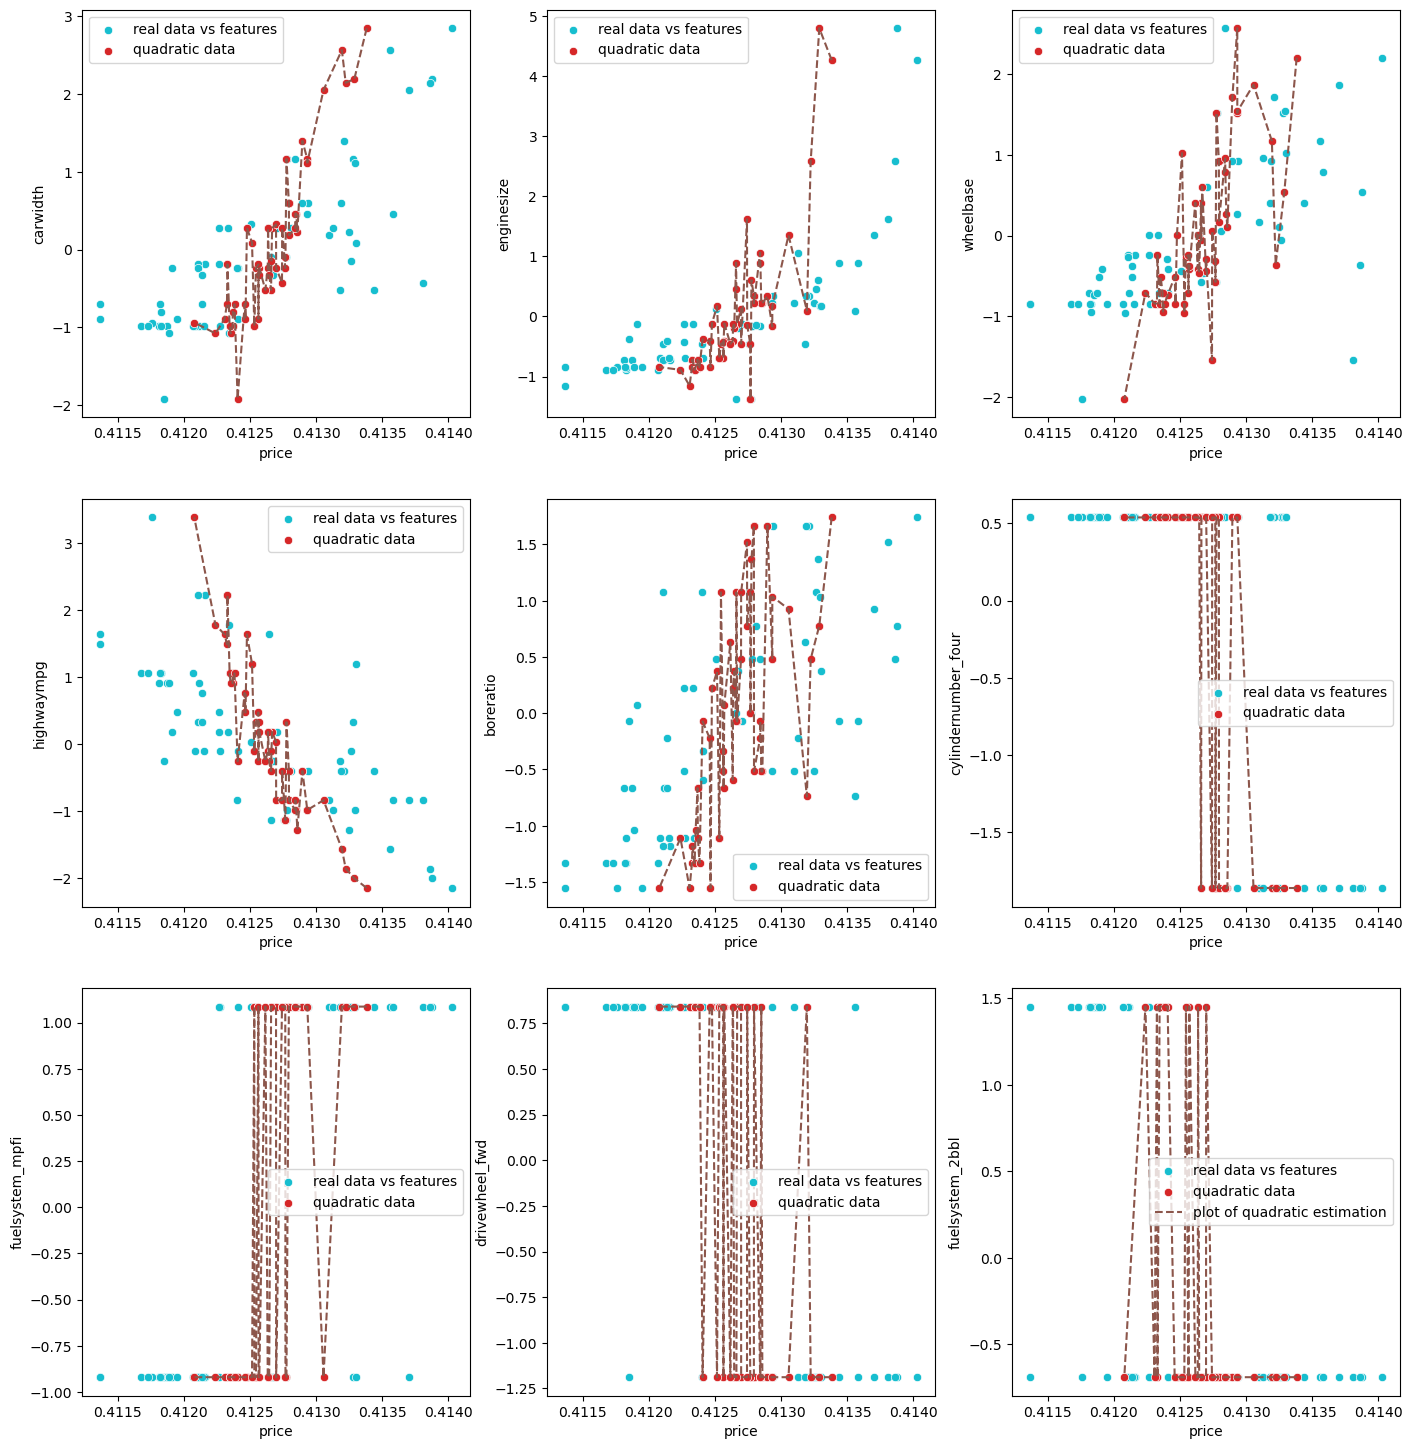

In [256]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (17,18))
axes = np.ravel(axes)

for i, j in enumerate(car_test.columns[0:-1]):


  sns.scatterplot(data = car_test, x = 'price', y = j, color = 'C9' ,ax = axes[i], label = 'real data vs features')
  sns.scatterplot(x = y_predict, y = car_test.iloc[:, i] , color = 'C3', ax= axes[i], label = 'quadratic data')
  axes[i].plot(y_pred, temp.iloc[:, i], color = 'C5', marker = '',linestyle = '--',  label = 'plot of quadratic estimation')

plt.legend()
  
  
plt.show()